<a href="https://colab.research.google.com/github/IVANTAKE/pyhton-work/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.**Set the environment and load the image**



In [ ]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
import re
#import the libraries we need
img = cv2.imread('image.png') #load the image we are going to process

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)#convert the text in the image into a string

'Possible Violations for Each Operation\nmg INSERT may violate any of the constraints:\n- Domain constraint: if one of the attribute values provided for the new\ntuple is not of the specified attribute domain\n- Key constraint: if the value of a key attribute in the new tuple already\nexists in another tuple in the relation\n- Entity integrity: if the primary key value is null in the new tuple\n- Referential integrity: if a foreign key value in the new tuple references a\nprimary key value that does not exist in the referenced relation\n\x0c'



2.**Display the original image**  





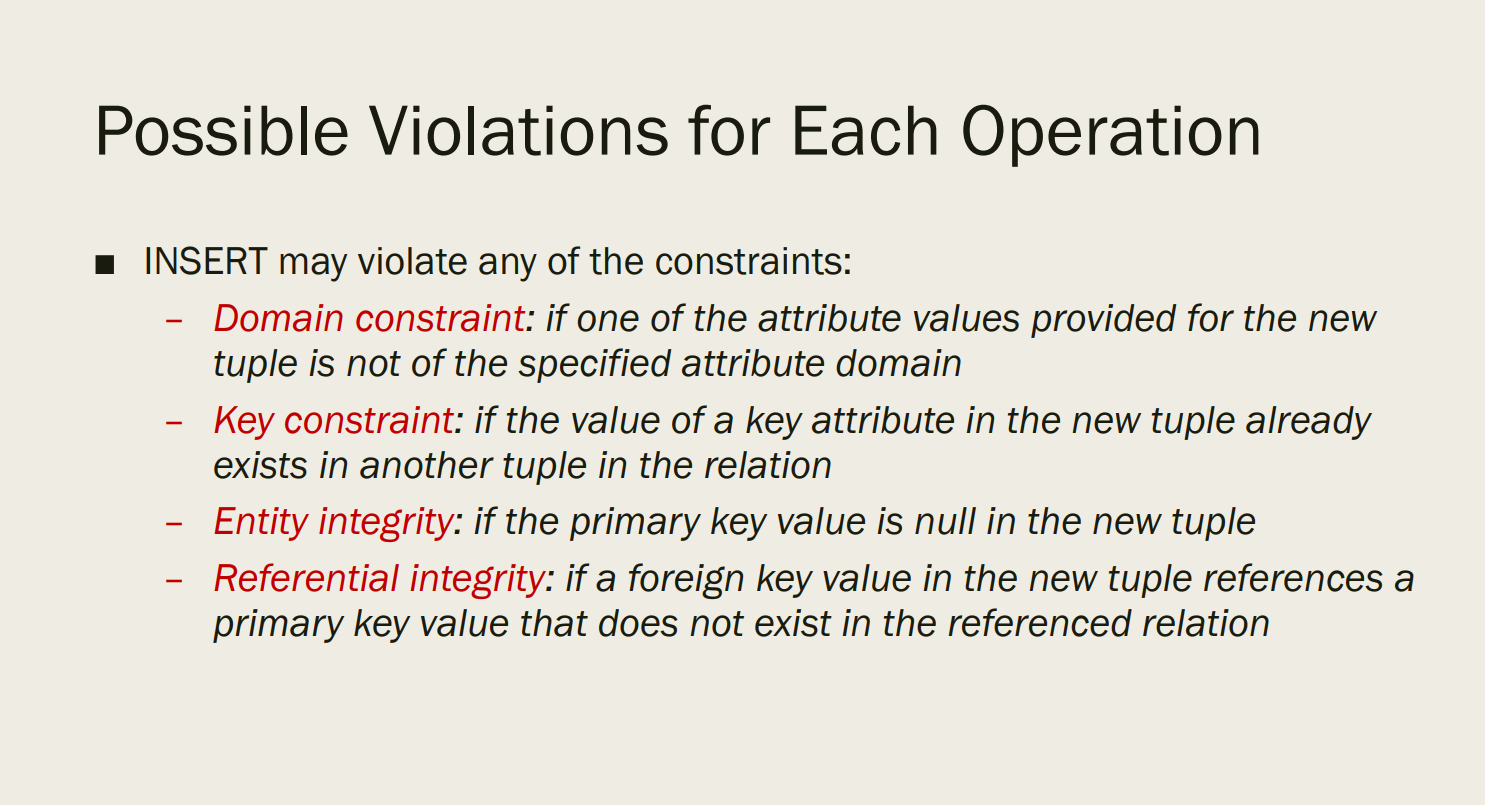

In [ ]:
from google.colab.patches import cv2_imshow
#since the cv2.imshow() could not be used directly in googlecolab, we need to insert this code
cv2_imshow(img)



3.**Pre-process the Image**  



In [ ]:
img = cv2.imread('image.png')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#use the cv2.matchTemplate funtion to find the best matching position for a small image in a large image and return a matrix representing the degree of matching.
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
image = cv2.imread('image.png')
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
#Set up pre names for each image processing to facilitate subsequent display

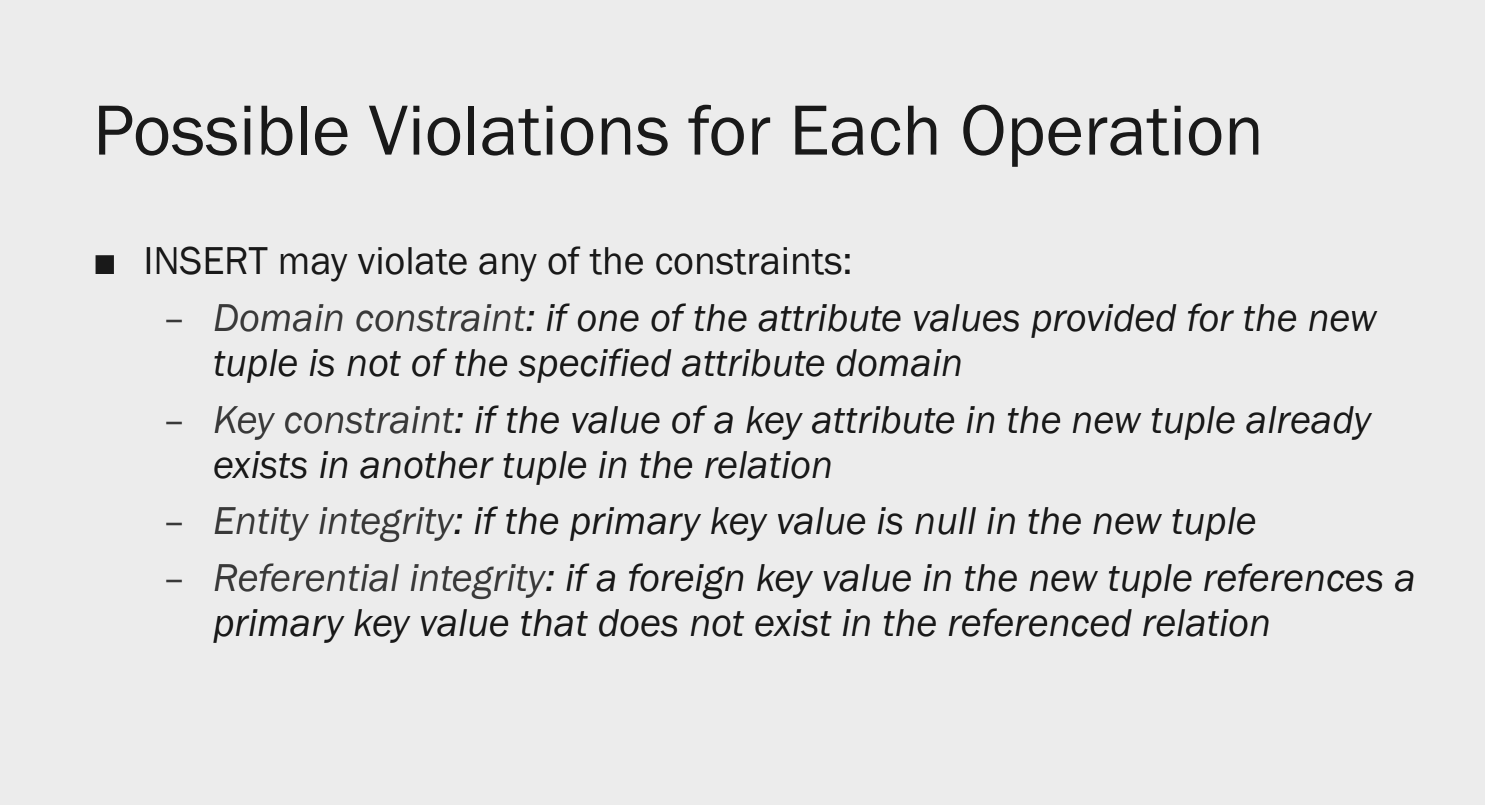

'Possible Violations for Each Operation\nm INSERT may violate any of the constraints:\n- Domain constraint: if one of the attribute values provided for the new\ntuple is not of the specified attribute domain\n- Key constraint: if the value of a key attribute in the new tuple already\nexists in another tuple in the relation\n- Entity integrity: if the primary key value is null in the new tuple\n- Referential integrity: if a foreign key value in the new tuple references a\nprimary key value that does not exist in the referenced relation\n\x0c'

In [ ]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

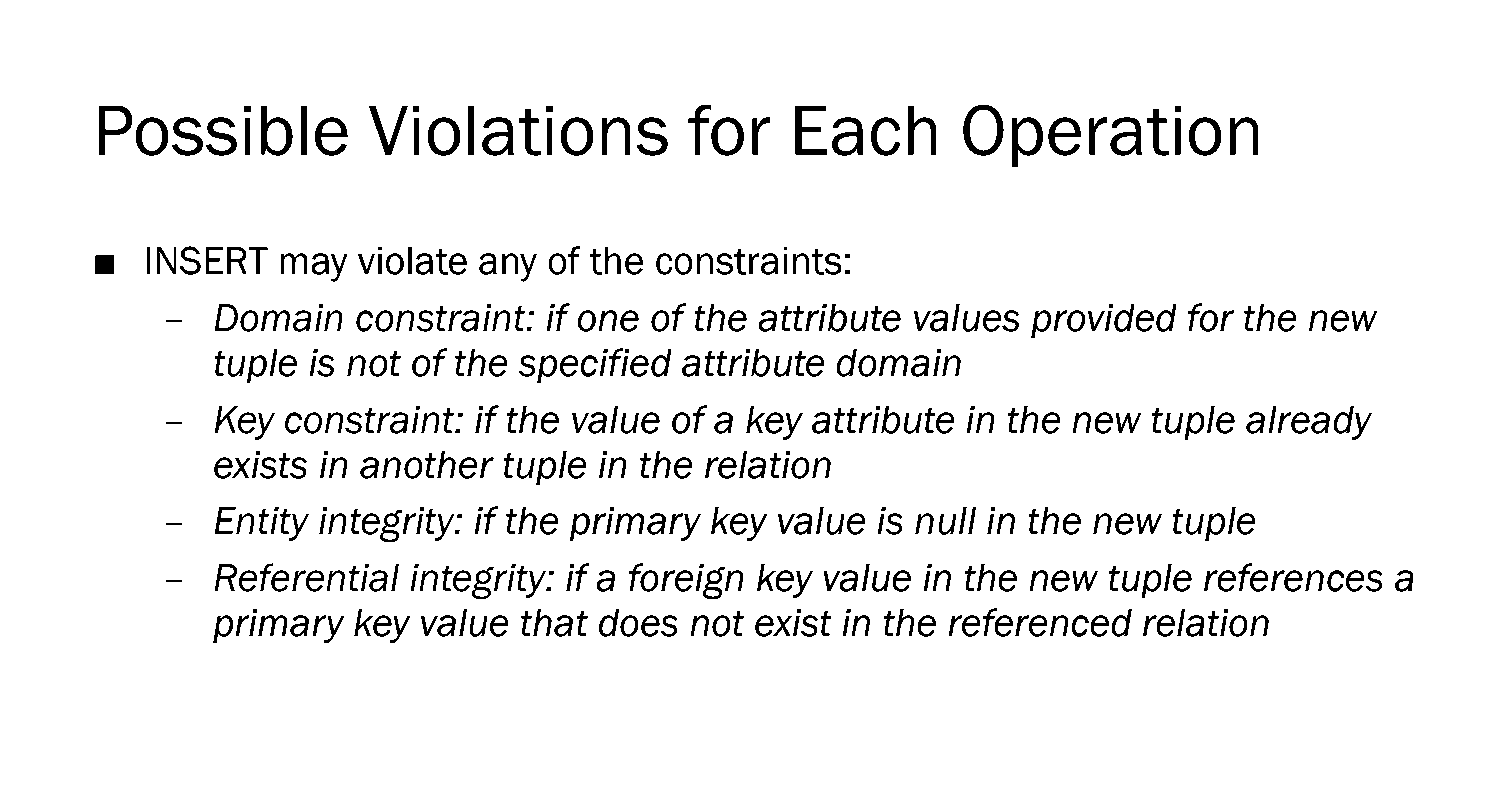

'Possible Violations for Each Operation\nm INSERT may violate any of the constraints:\n- Domain constraint: if one of the attribute values provided for the new\ntuple is not of the specified attribute domain\n- Key constraint: if the value of a key attribute in the new tuple already\nexists in another tuple in the relation\n- Entity integrity: if the primary key value is null in the new tuple\n- Referential integrity: if a foreign key value in the new tuple references a\nprimary key value that does not exist in the referenced relation\n\x0c'

In [ ]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

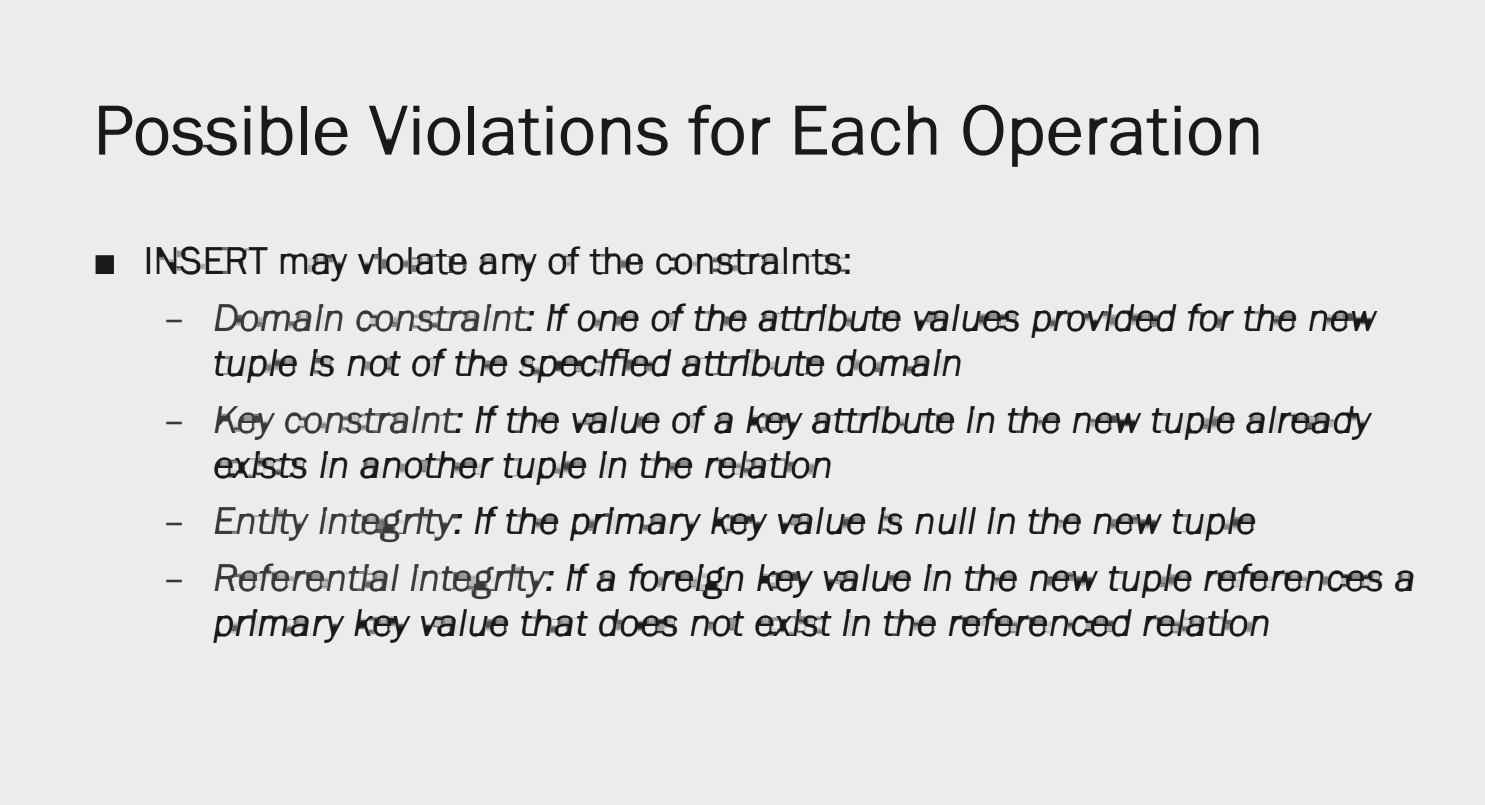

'Possible Violations for Each Operation\nmg INSERT may violate any of the constralnts:\n- Domain constraint: If one of the attribute values provided for the new\ntuple Is not of the specified attribute domain\n- Key constraint If the value of a key attribute In the new tuple already\nexists In another tuple In the relation\n- Entity Integrity: If the primary key value Is null In the new tuple\n- Referential Integrity: If a forelgn key value In the new tuple references a\nprimary key value that does not exist In the referenced relation\n\x0c'

In [ ]:
img = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

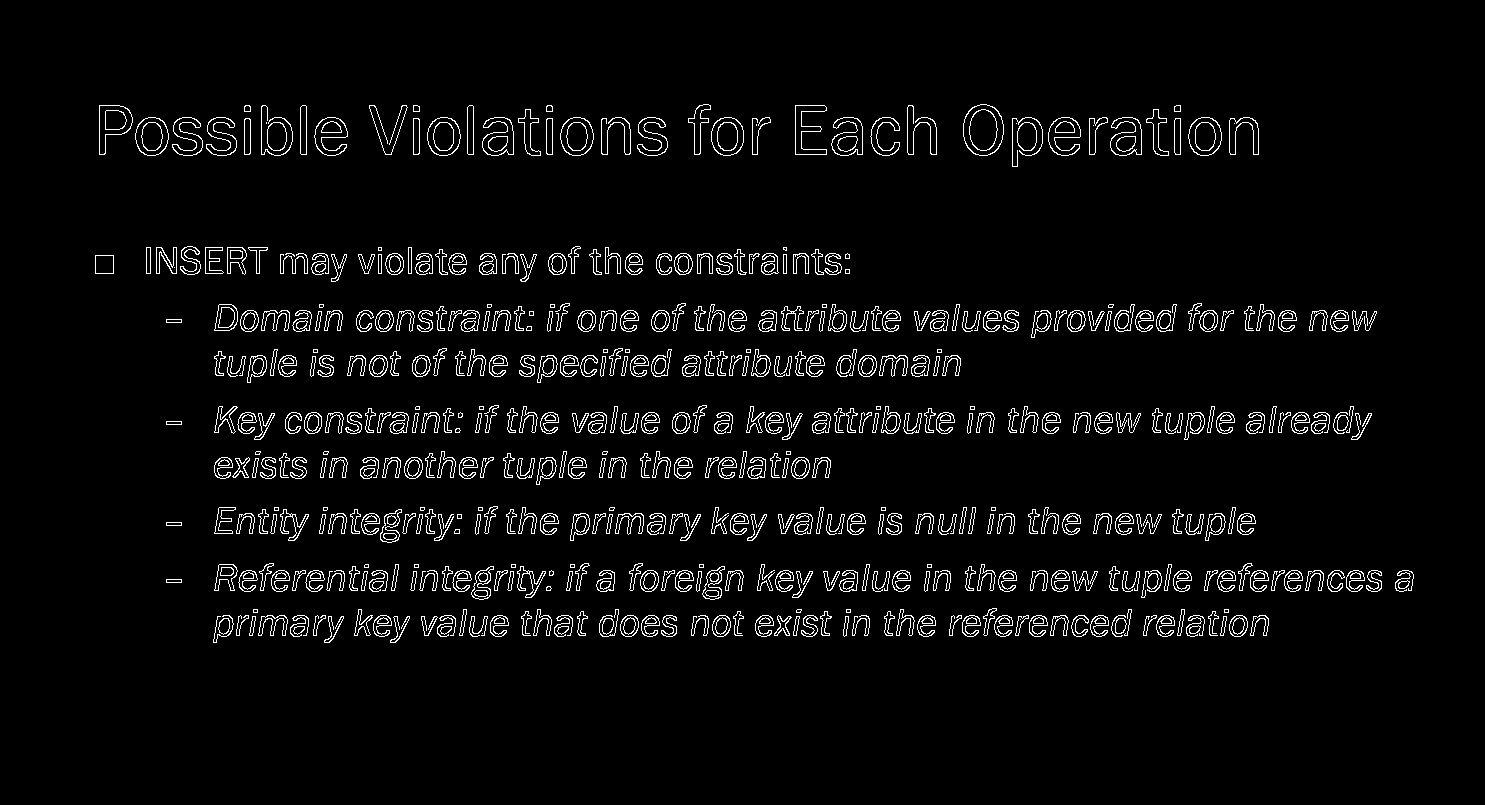

'Possible Violations for Each Operation\noO INSERT may violate any of the constraints:\n= Domain constraint: if one of the attribute values provicied for the new\ntuple is not of the specified attribute domain\n- Key constraint: if the value of a key attribute in the new tuple already\nexists in another tuple in the relation\n- Entity integrity: if the primary key value is null in the new tuple\n- Referential integrity: if a foreign key value in the new tuple references @\nprimary key value thet does not exist in the referenced relation\n\x0c'

In [ ]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)



4.**Text Detection**  



In [ ]:
img = cv2.imread('image.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


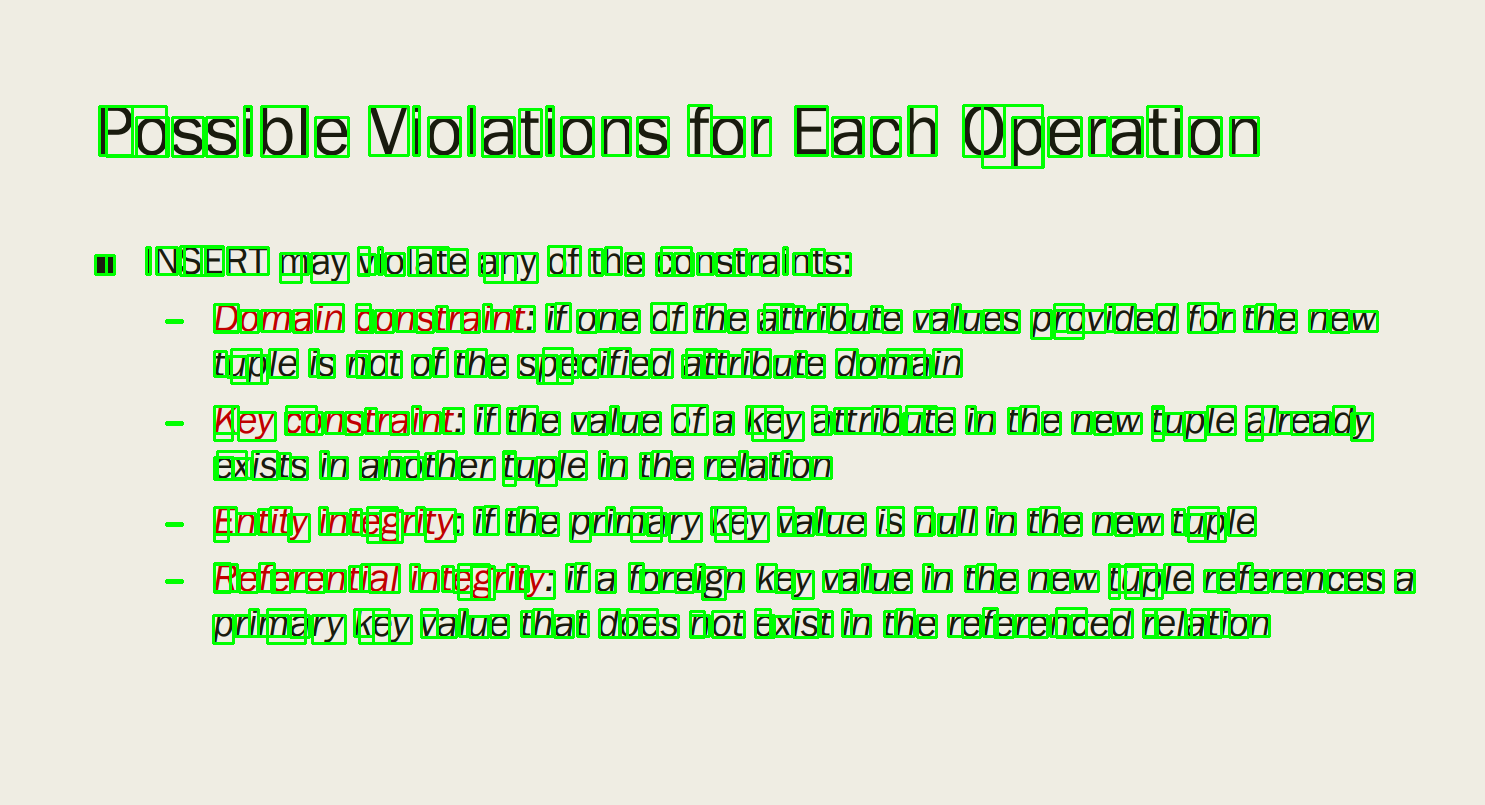

-1

In [ ]:
#This code is used to detect the letters in the image
img = cv2.imread('image.png')

h, w, c = img.shape #get the height, width, and number of channels of the image
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

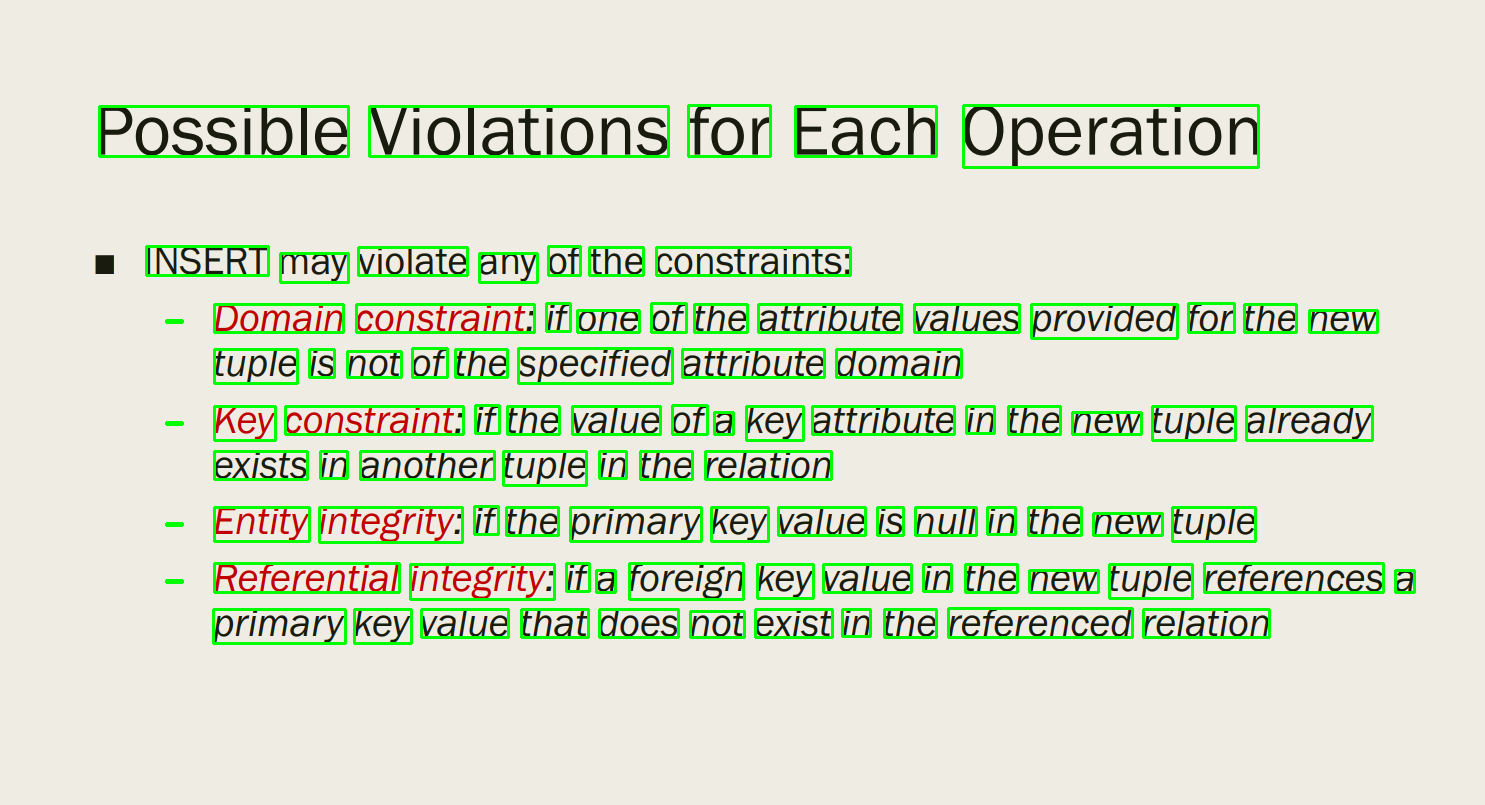

-1

In [ ]:
#This coed is used to detect the words in the image
img = cv2.imread('image.png')
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:  #set the confidence level we need
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

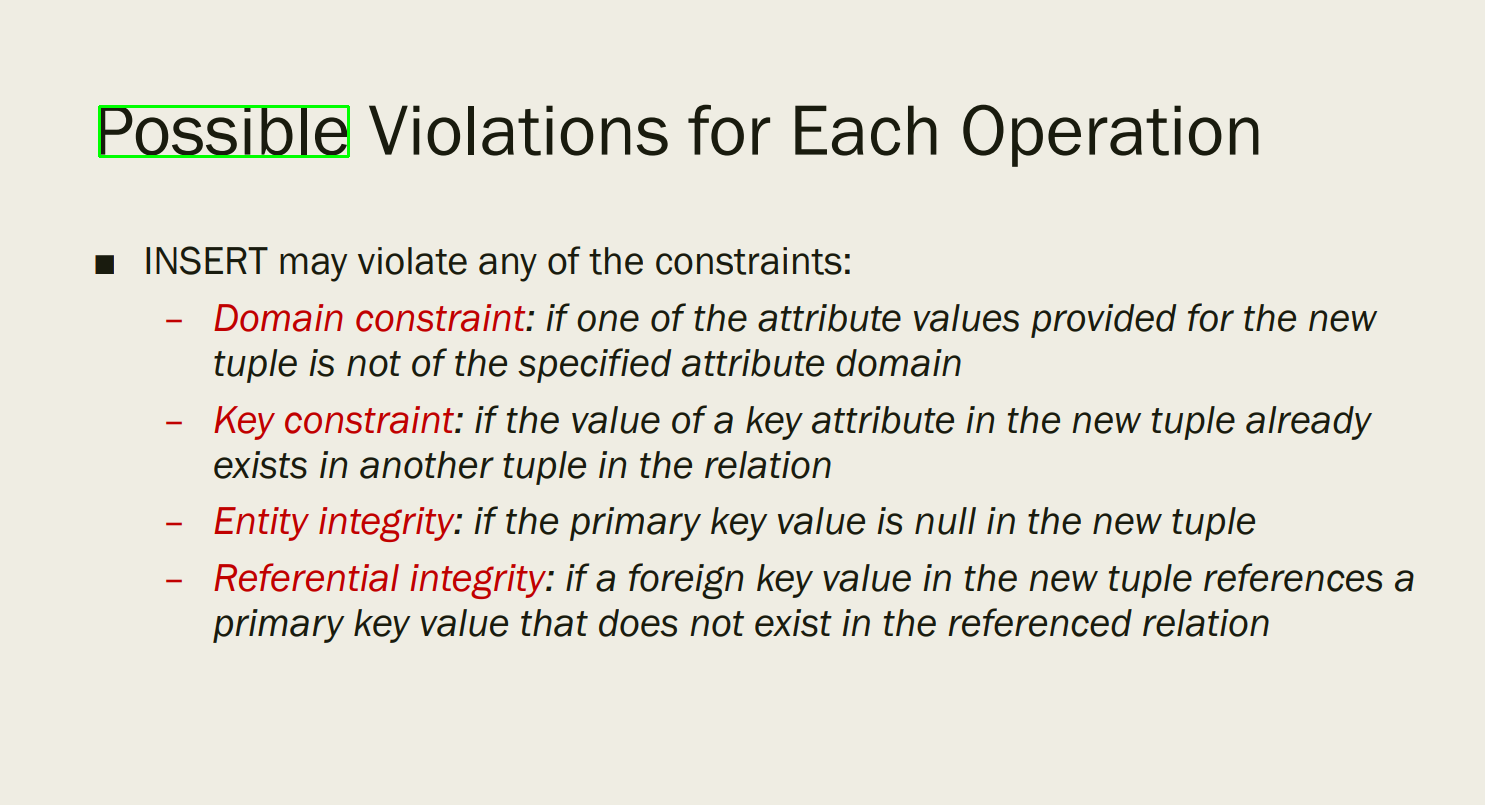

-1

In [ ]:
#This code is used to detect specific words
img = cv2.imread('image.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = r'\bPossible\b' #set the word we need to detect

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

In [ ]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))
#This code is used to identify numbers in the image, but the image I selected does not have a single number, yet it still recognizes many numbers, which troubles me

0
-
0
-
-.
-2



In [ ]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)
#This code is used to detect the words in the image

'Possible Violations for Each Operation\nmg INSERT may violate any of the constraints:\n- Domain constraint: if one of the attribute values provided for the new\ntuple is not of the specified attribute domain\n- Key constraint: if the value of a key attribute in the new tuple already\nexists in another tuple in the relation\n- Entity integrity: if the primary key value is null in the new tuple\n- Referential integrity: if a foreign key value in the new tuple references a\nprimary key value that does not exist in the referenced relation\n\x0c'

In [ ]:
#Set up a function to recognize and extract text from the image for easy calling in the subsequent sections
def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to a grayscale image first
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU threshold to detect the text in the image
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  #Perform various processing on images to facilitate text extraction
  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()
#Detect the text in the iamge and extract the text in the file

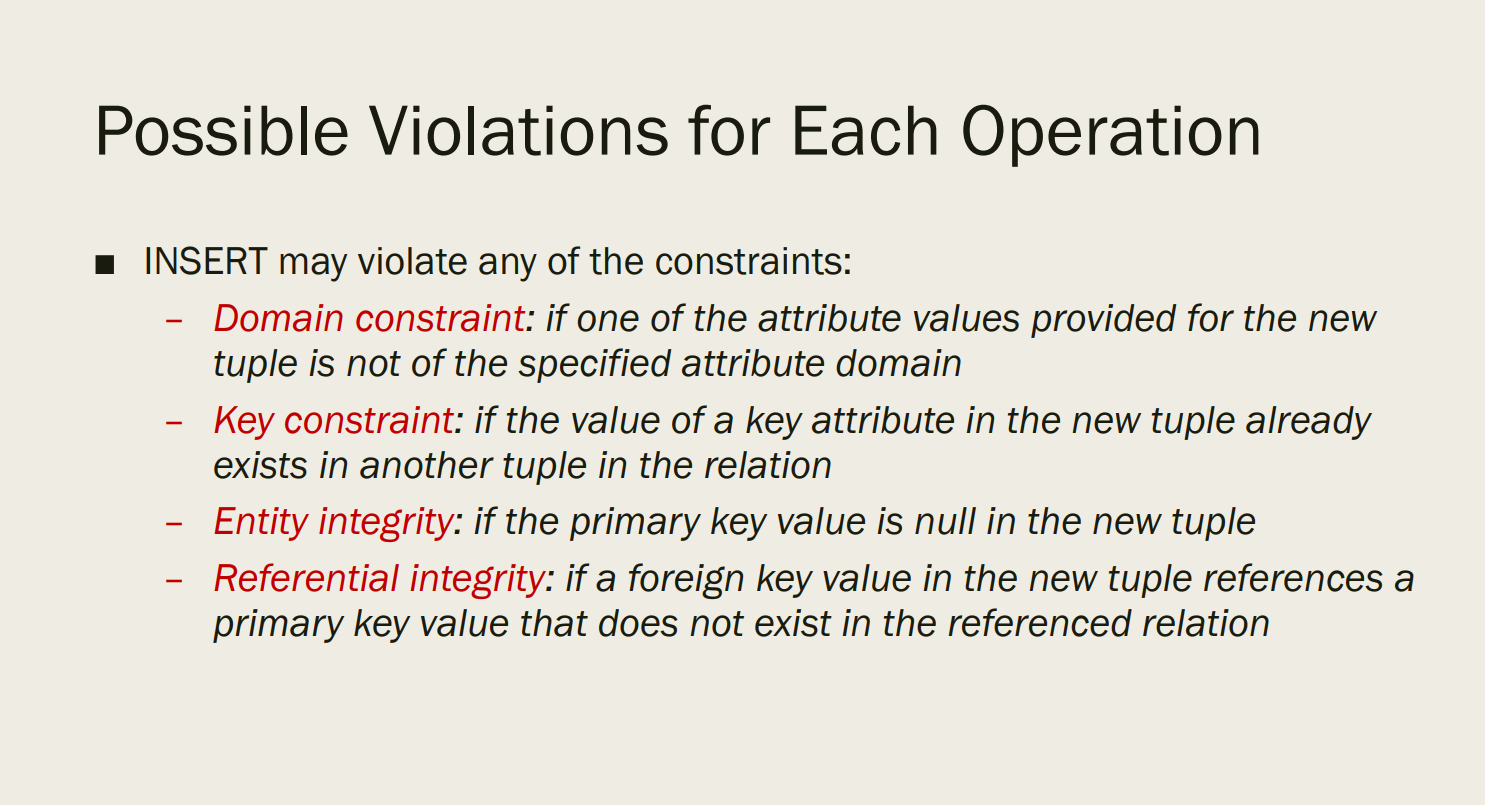



for



Operation



Possible



Violations



Each



INSERT may violate any of the constraints:





tuple is not of the specified attribute domain

Domain constraint: if one of the attribute values provided for the new





exists in another tuple in the relation

Key constraint: if the value of a key attribute in the new tuple already





Entity integrity: if the primary key value is null in the new tuple





primary key value that does not exist in the referenced relation

Referential integrity: if a foreign key value in the new tuple references a





In [ ]:
image = cv2.imread("image.png")
read_text_from_image(image)

# show the OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()

In [ ]:
#code reference:https://colab.research.google.com/github/r3gm/InsightSolver-Colab/blob/main/OCR_with_Pytesseract_and_OpenCV.ipynb#scrollTo=AW5G0NDPc_0Q